In [175]:
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
data_customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
data_transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [177]:
data_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [178]:
data_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


Data Cleansing

In [179]:
data_customer.shape

(447, 5)

In [180]:
data_transaction.shape

(5020, 8)

In [181]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


Data Cleansing

In [182]:
data_customer['Income'] = data_customer['Income'].str.replace(',', '.').astype(float)

In [183]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


In [184]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [185]:
data_transaction = data_transaction.astype({
    'Date' : 'datetime64[ns]',
})

C:\Users\Acer\AppData\Local\Temp\ipykernel_16660\2947263499.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_transaction = data_transaction.astype({


In [186]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


Data Merge

In [187]:
data_gabung = pd.merge(data_transaction, data_customer, on='CustomerID')

In [188]:
data_gabung.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53
1,TR67395,328,2022-01-22,P8,16000,3,48000,11,36,0,Married,10.53
2,TR89012,328,2022-03-25,P5,4200,5,21000,6,36,0,Married,10.53
3,TR97172,328,2022-05-21,P1,8800,5,44000,1,36,0,Married,10.53
4,TR57013,328,2022-09-15,P7,9400,6,56400,1,36,0,Married,10.53


In [189]:
data_gabung = data_gabung.groupby('CustomerID').agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

In [190]:
data_gabung.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [191]:
data_cluster = data_gabung[['TransactionID', 'Qty', 'TotalAmount']]

In [200]:
data_cluster.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


Clustering

In [192]:
from sklearn.cluster import KMeans

In [201]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

inertia

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\User

[6928031859602.738,
 2434662706463.3955,
 1233000762874.8535,
 776645420224.5259,
 504081360603.5857,
 382088010650.5574,
 279905492665.491,
 212894623238.45837,
 170169609419.17444,
 136872232349.77818]

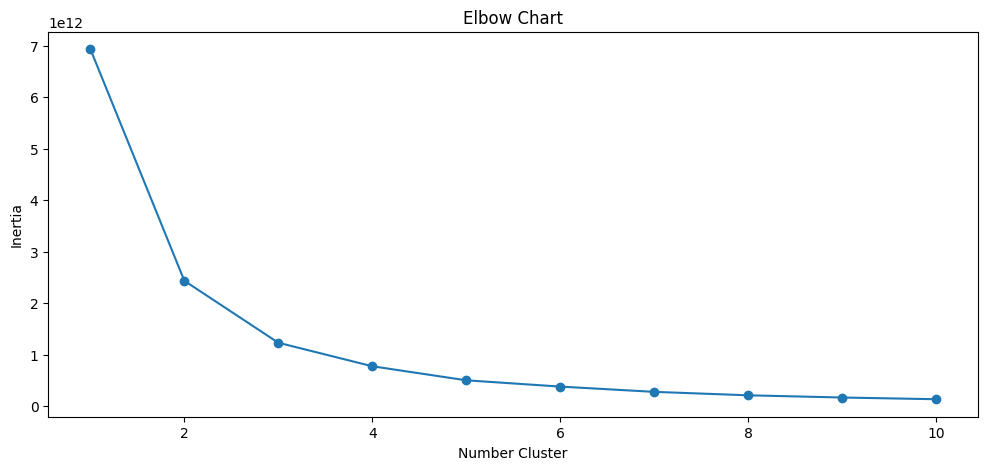

In [202]:
plt.figure(figsize=(12,5))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Chart')
plt.show()

In [203]:
k = 3  
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_cluster)

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [207]:
data_cluster['cluster'] = kmeans.labels_

C:\Users\Acer\AppData\Local\Temp\ipykernel_16660\2068648676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = kmeans.labels_


In [208]:
data_cluster

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,0
1,13,57,392300,2
2,15,56,446200,2
3,10,46,302500,1
4,7,27,268600,1
...,...,...,...,...
442,16,59,485100,0
443,18,62,577700,0
444,18,68,587200,0
445,11,42,423300,2


In [209]:
cluster_counts = data_cluster['cluster'].value_counts().reset_index()

In [210]:
cluster_counts.columns = ['Cluster', 'Count']
cluster_counts

,Cluster,Count
0,2,186
1,1,171
2,0,90
